Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

# Assignment 7
## Rasmus Durgé, Anton Danielli
### Time spend : 20h, 20h

In [1]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import regularizers

In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


## Question 1
Preprocessing. In the notebook, the data is downloaded from an external server imported into the notebook environment using the mnist.load_data()function call. Explain the data pre-processing high-lighted in the notebook.

## Answer
So first of we have "(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()". This downloads a dataset of 60,000 greyscale images of the 10 digits, we also get a test set of 10,000 images. \\
Then we have: \\
x_train = x_train.astype('float32') \\
x_test = x_test.astype('float32')

x_train /= 255 \\
x_test /= 255

What these four lines do is they convert the training data which is a greyscale integer from 0..258 to be a float between 0.. 1 instead.


y_train = keras.utils.to_categorical(lbl_train, num_classes) \\
y_test = keras.utils.to_categorical(lbl_test, num_classes)

The last two lines converts our labels (correct integers) to instead be represented as binary class matrices, meaning that the correct number is indicated by a 1 in the proper index instead of a number.

In [6]:

## Define model ##

model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
print(score)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8257 - accuracy: 0.7642 - val_loss: 0.2655 - val_accuracy: 0.9240
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.9294 - val_loss: 0.1982 - val_accuracy: 0.9423
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.9460 - val_loss: 0.1563 - val_accuracy: 0.9516
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9572 - val_loss: 0.1380 - val_accuracy: 0.9586
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.1235 - val_accuracy: 0.9622
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1085 - accuracy: 0.9677 - val_loss: 0.1182 - val_accuracy: 0.9642
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9726 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 

In [ ]:
#model.summary()
model.input_shape

(None, 28, 28, 1)

## Question 2
A) How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is thetotal number of parameters for the network?Why does the input and output layers have the dimensions they have? \\


B) What loss-function is used to train the network? What is the functional form(mathematical expression) of the loss function? and how should we interpret it?Why is it appropriate for the problem at hand? \\

C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch. \\

D)Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40epochs. What is the best validation accuracy you can achieve? –Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reachavalidation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay(L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden unitsand train and select 5regularization factorsfrom 0.000001to 0.001. Train 3replicatesnetworks for each regularization factor. Plot the final validation accuracy with standard deviation(computed from the replicates)as a function of the regularization factor. How close do you get to Hintons result? –If you do not get the same results, what factors may 
influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

## Answer 2A)
1. **How many layers does the network in the notebook have?** A layer is built everytime we call the add function so it has four layers (one could also say that we have three layers since it is common to not count the input layer), 1 inuput, 2 hidden and one output.
2. **How many neurons does each layer have?** The input layer has 28*28 neurons, we know this number from the shape of our training data, we can also easily compute it via: model.input_shape(), so 784. Next the hidden layers does reveal their neurons, 60, 60 and we can get the last one from model.summary() = 10.
So in total 784 + 60 + 60 + 10 = 922
3. **What activation functions and why are these appropriate for this application?** So for the two hidden layers we use relu and for output we use softmax. For hidden layers we usually consider three different activation functions : Relu, Sigmoid and Hyberbolic.
The biggest advantage of using ReLU is that it does activate all the neurons
simultaneously.
This means that we only deactivate the neurons if the output of the linear transformation is negative.
For negative input values, the neuron will get a negative result and will not 
be activated. This means that only a set amount of neurons will be activated 
and thus ReLU is more efficient compared to sigmoid and hyperbolic function. \\
The biggest advantage of softmax is that the output is a probability, 
meaning that we get a number from 0 to 1 and if we sum over all output
nodes we get 1. Softmax is very handy in this case as we will choose
the node with the highest probability
4. **What is the total number of parameters for the network?** The total number of parameters is 55,050, we got this number from model.summary()
5. **Why does the input and output layers have the dimensions they have?** For starters the output is a 10 dimensional vector. Our output from this NN is to distuinguish a number from 0-9, so its very fitting to have 10 different answers for this in order to cover every number.  The input vector needs to have the same dimensions as the training data has so it all depends on the data.

## B)
1. **What loss-function is used to train the network?** We use keras.losses.categorical_crossentropy as the loss function
2. **What is the functional form(mathematical expression) of the loss function** $Loss = - \sum_{i=1}^{output size} y_{i} * log{(\hat{y_{i}})}$. In this equation $y_{i}$ is the i-th scalar in the model output, $\hat{y_{i}}$ is the corresponding target value and we sum over the scalar values in the model output.
3. **How should we interpret it?** The object of the loss function is to quantify the difference between 
two probability distributions and its especially good if its discrete 
distributions. So in our situtation $y_i$ is the probability that event $i$
occurs and since we sum over all events we get 1, and this means only one
event may occur.
4. **Why is it appropriate for the problem at hand?** This loss function is very handy in classification tasks, this is because 
we can put a probabilty that a certain item belongs to a certain category.
In our case we use categorial crossentropy to learn to give a high probability
to the proper digit and low probability to the wrong digits.

## C)
See code below


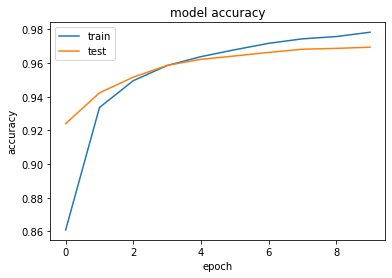

In [7]:
#Train the network for 10 epochs and plot the training and validation accuracy for each epoch.
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


## D) 
See code below
Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. 
Train for 40epochs. 
What is the best validation accuracy you can achieve? –Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reacha validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay(L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). 

Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. 
Train 3 replicates networks for each regularization factor. 
Plot the final validation accuracy with standard deviation(computed from the replicates)as a function of the regularization factor. 
How close do you get to Hintons result? 
–If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

Running the sequential NN where we change the hidden layers units to 500 and 300 and training for 40 epochs we get 0.9824 as the highest validation accuracy. Goeff Hinton reached 0.9847, however the link provided in the assignment does not work so its hard to tell exactly which factors differ.
We can make some guesses though and its probably due to what regularizers we use. These factors seems to be choosen randomly and it could be an improvement if we chose them according to the validation set somehow.



In [19]:
#2D
## Define model ##
result = []
regu_factors = np.linspace(0.000001 , 0.001 , num = 5)
for i in range(0,4):
  for j in range(0,2):
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(500, activation = 'relu',activity_regularizer=regularizers.l2(regu_factors[j])))
    model.add(Dense(300, activation = 'relu',activity_regularizer=regularizers.l2(regu_factors[j])))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=40,
              verbose=2,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    result.append(fit_info.history['val_accuracy'][-1])
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


Epoch 1/40
469/469 - 5s - loss: 0.3984 - accuracy: 0.8898 - val_loss: 0.2185 - val_accuracy: 0.9351
Epoch 2/40
469/469 - 5s - loss: 0.1872 - accuracy: 0.9463 - val_loss: 0.1551 - val_accuracy: 0.9533
Epoch 3/40
469/469 - 5s - loss: 0.1359 - accuracy: 0.9612 - val_loss: 0.1250 - val_accuracy: 0.9627
Epoch 4/40
469/469 - 4s - loss: 0.1062 - accuracy: 0.9692 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 5/40
469/469 - 5s - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.0909 - val_accuracy: 0.9713
Epoch 6/40
469/469 - 4s - loss: 0.0724 - accuracy: 0.9795 - val_loss: 0.0932 - val_accuracy: 0.9705
Epoch 7/40
469/469 - 4s - loss: 0.0613 - accuracy: 0.9822 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 8/40
469/469 - 5s - loss: 0.0524 - accuracy: 0.9860 - val_loss: 0.0750 - val_accuracy: 0.9761
Epoch 9/40
469/469 - 5s - loss: 0.0452 - accuracy: 0.9874 - val_loss: 0.0705 - val_accuracy: 0.9771
Epoch 10/40
469/469 - 4s - loss: 0.0394 - accuracy: 0.9896 - val_loss: 0.0688 - val_accuracy: 0.9788

A) Design a model that makes use of at least one convolutional layer
–how performant a model can you get? 
--According to the MNIST database it shouldbepossible reach to 99% accuracy on the validation data. 
If you choose to use any layers apart fromconvolutional layers and layers that you used in previous questions, you must describe what they do. 
If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.

B)Discuss the differences and potential benefits of using convolutional layers over fully connected onesfor the particular application?

In [9]:
#Defining CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#Training CNN model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=40,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/40
469/469 - 46s - loss: 2.2946 - accuracy: 0.1608 - val_loss: 2.2874 - val_accuracy: 0.1979
Epoch 2/40
469/469 - 45s - loss: 2.2794 - accuracy: 0.2693 - val_loss: 2.2712 - val_accuracy: 0.3474
Epoch 3/40
469/469 - 45s - loss: 2.2624 - accuracy: 0.4320 - val_loss: 2.2527 - val_accuracy: 0.4976
Epoch 4/40
469/469 - 45s - loss: 2.2422 - accuracy: 0.5517 - val_loss: 2.2297 - val_accuracy: 0.5907
Epoch 5/40
469/469 - 45s - loss: 2.2165 - accuracy: 0.6166 - val_loss: 2.1999 - val_accuracy: 0.6415
Epoch 6/40
469/469 - 45s - loss: 2.1824 - accuracy: 0.6579 - val_loss: 2.1594 - val_accuracy: 0.6775
Epoch 7/40
469/469 - 46s - loss: 2.1352 - accuracy: 0.6857 - val_loss: 2.1028 - val_accuracy: 0.7057
Epoch 8/40
469/469 - 46s - loss: 2.0691 - accuracy: 0.7050 - val_loss: 2.0236 - val_accuracy: 0.7202
Epoch 9/40
469/469 - 45s - loss: 1.9767 - accuracy: 0.7133 - val_loss: 1.9131 - val_accuracy: 0.7271
Epoch 10/40
469/469 - 46s - loss: 1.8498 - accuracy: 0.7201 - val_loss: 1.7643 - val_accura

## A)
The additional layer we use when fitting the model is (apart from conv2d which is in the task) MaxPooling2D, and flatten.
MaxPooling2D is an operation that calculates the largest value of
each patch for every feature map. We also use Max Pooling to 
help reduce over fitting and it also reduces the computational cost
of the NN by reducing the number of parameters to learn.
MaxPooling is often used in 
pair with convolutional layers.
Flatten is used to flatten the input, if we apply it to a input
of size (3,3) the output will be of size (0,4).
This creates a 1-dimensional vector that is then passed to the
dense layers. The highest validation accuracy we got was 90%, we made several attempts with different sized convolutional matrices and also different sized dense layers but we didnt get more than 90%. Another problem we ran into was that it was hard to make trials since the program takes a long time to run. We also tried Dropout layers and weights but this didnt help either.

## B)

CNN is a very good tool for image classification mainly because
of its high accuracy. What makes CNN different and better
is that in fully connected ones we lose a lot of spatial 
interaction between acdjacent pixels. A CNN has a solution
for this via its kernel matrices scanning segments of the image thereby 
downsampling it by detecting important areas, then using a prediction layer at the end.

Also CNN doesnt have to train as many parameters since the output pixels only looks at
smaller matrices of the entire image, and as a final note it is very intuitive to look at
adjacent pixel groups in image recognition since its more likely that they will be correlated when predicting what the image is.

### Question 4) Auto-Encoder for denoising


**a)** The autoencoder model serves to compress and decompress images with and without noise in succession with the help of an encoder and decoder. To prepare the data, "salt and pepper" noise is added at random by allocating random bits from zero to one to the training data. The neural network then attempts to reconstruct and denoise the image. The loss function describes a distance between the compressed and the decompressed data. The model therfore attempts to minimize this loss function to achieve the greatest quality outcome.

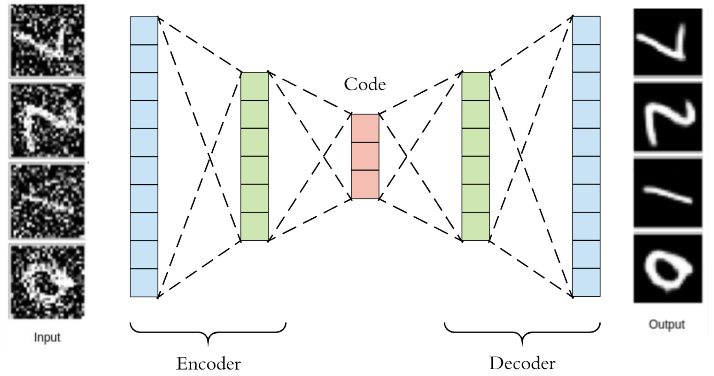

In [10]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [11]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

B) Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1).Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised versions. (Hint: for visualization use imshow(), use the trained autoencoder from 4A to denoise the noisydigits). At what noise level does it become difficult to identify the seasoned digits for you? At what noise leveldoes the denoising stop working?

In [12]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 7s 7ms/step - loss: 0.2439 - val_loss: 0.1549
Epoch 2/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1507 - val_loss: 0.1398
Epoch 3/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1388 - val_loss: 0.1339
Epoch 4/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1328 - val_loss: 0.1310
Epoch 5/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1294 - val_loss: 0.1293
Epoch 6/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1267 - val_loss: 0.1275
Epoch 7/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1256 - val_loss: 0.1259
Epoch 8/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1241 - val_loss: 0.1255
Epoch 9/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1232 - val_loss: 0.1242
Epoch 10/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1220 - val_loss: 0.1239

## B)
We used three randomly selected images from the data,
the images is sorted in a way where we increase the noise
with 10% from left to right starting at 0 and going to 90%.
Each line as also paired with its decoded image underneath,
which is also influenced by a noise factor.
In the original case we usually lose readability around 50-60 %
while in the decoded image the threshold is a bit higher, at 70-80%.
However it could also be the case that we are influenced by the 
previous pictures and hence we know what the number is,
for instance if we pick a random image the threshold for 
readability would probabably be lower in many cases since we cannot use
previous less seasoned images for reference.

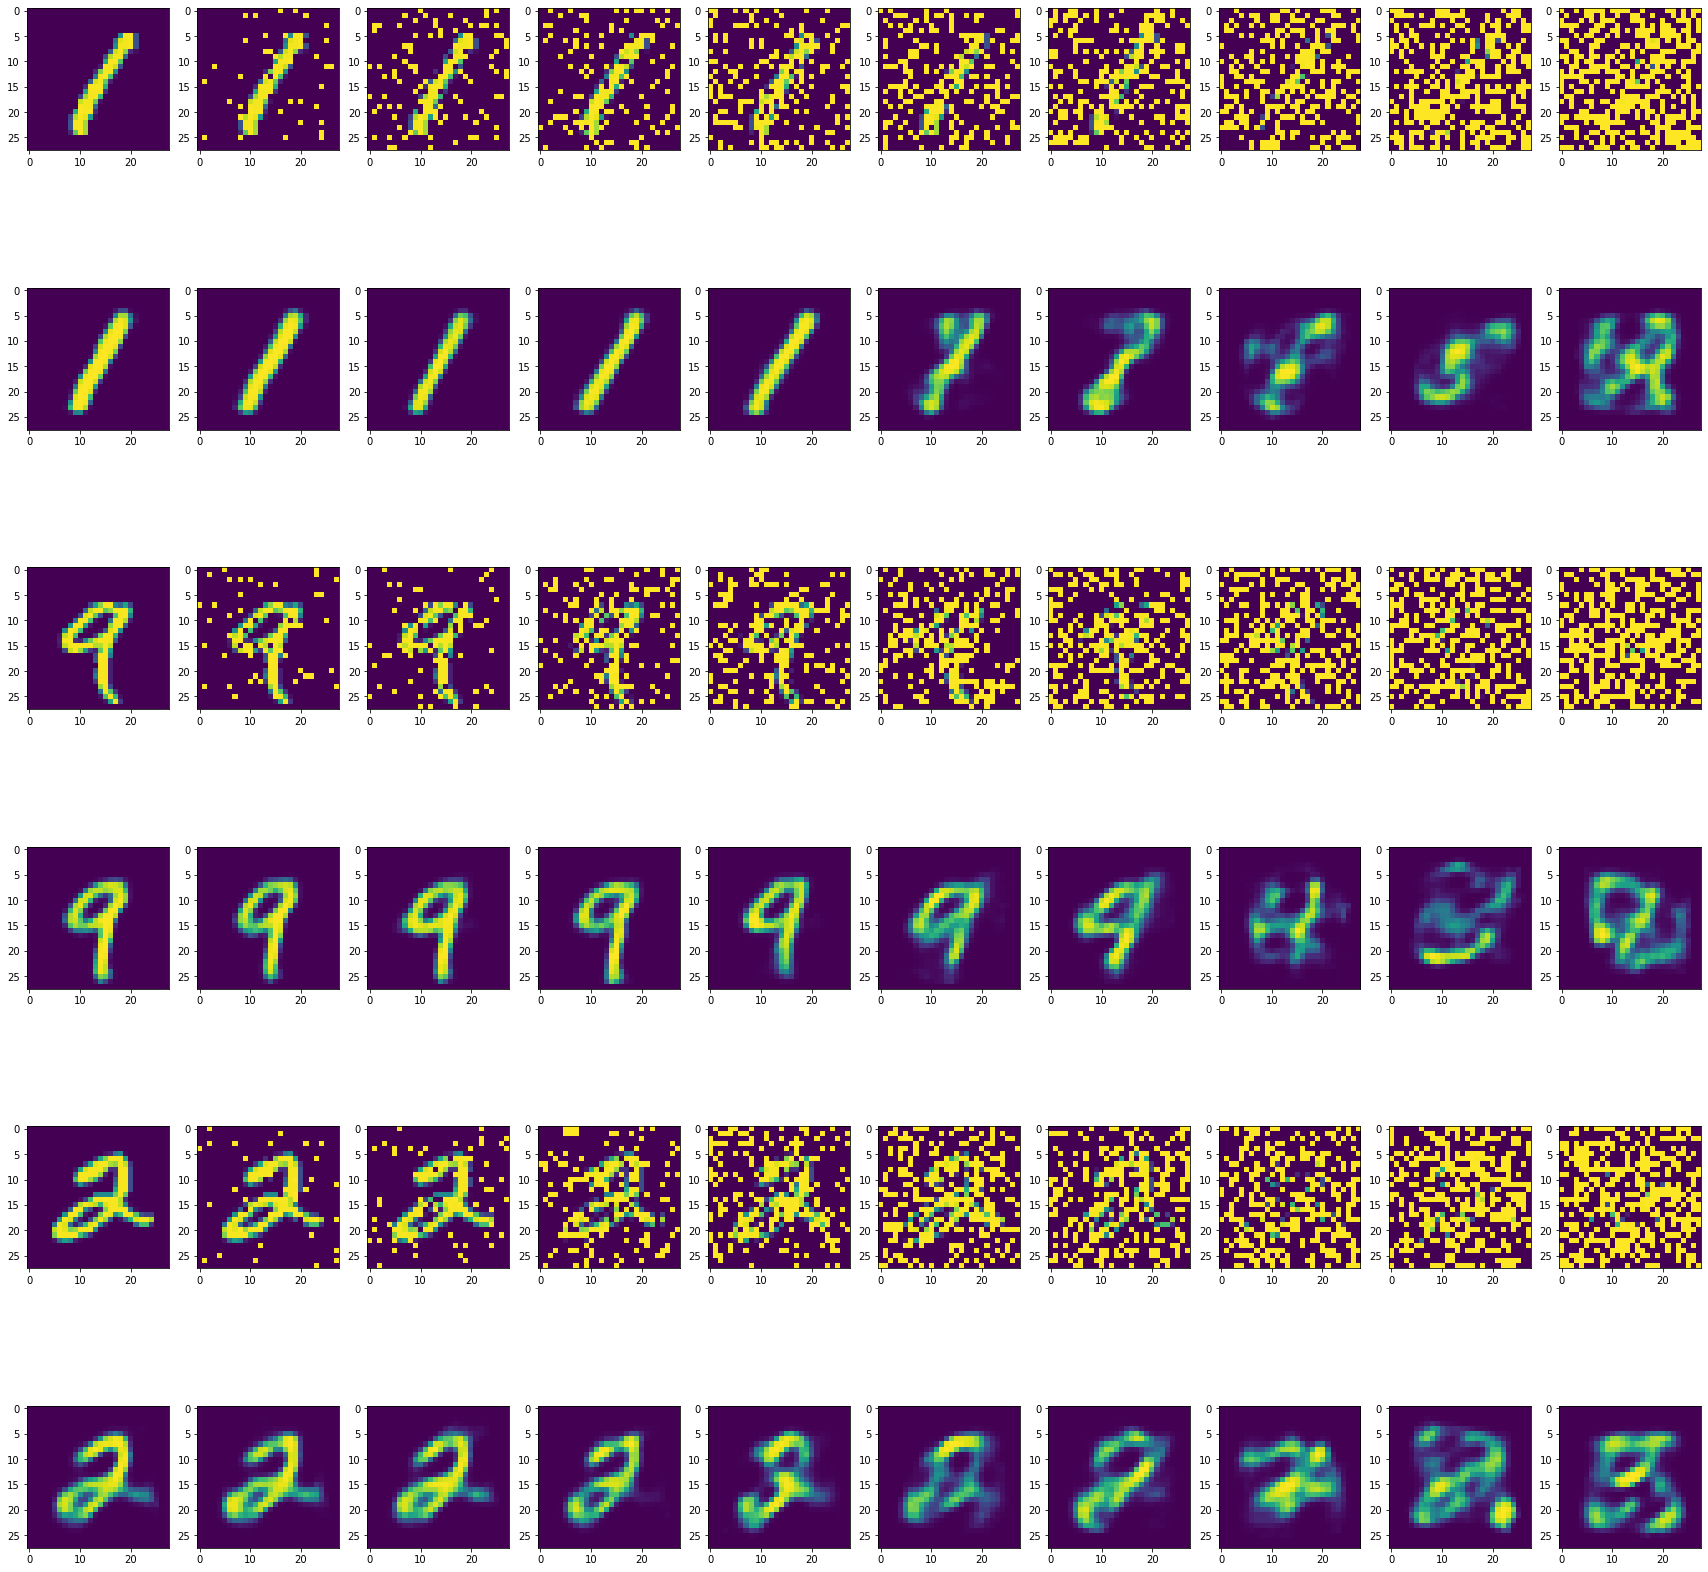

In [20]:
##4b
#Noises 
noises = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
num_rows = 6
num_cols = 10
f, axarr = plt.subplots(nrows = num_rows , ncols = num_cols,figsize = (30,30)) 
for row in range(num_rows):
   for col in range(num_cols):
    #Plotting a number with salt and pepper followed by its autoencoded image
    axarr[0,col].imshow(tf.reshape(salt_and_pepper(flattened_x_train[3].reshape(1,-1), noise_level = noises[col]),(28,28)))
    axarr[1,col].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[3].reshape(1,-1),noise_level = noises[col])), shape = (28,28)))
    
    axarr[2,col].imshow(tf.reshape(salt_and_pepper(flattened_x_train[4].reshape(1,-1), noise_level = noises[col]),(28,28)))
    axarr[3,col].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[4].reshape(1,-1),noise_level = noises[col])), shape = (28,28)))
    
    axarr[4,col].imshow(tf.reshape(salt_and_pepper(flattened_x_train[5].reshape(1,-1), noise_level = noises[col]),(28,28)))
    axarr[5,col].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[5].reshape(1,-1),noise_level = noises[col])), shape = (28,28)))
    
    
plt.show()